# Object Detection in Google Colab with Fizyr Retinanet

Jupyter notebook providing steps to train a Keras/Tensorflow model for object detection with custom dataset.

It runs in Google Colab using [Fizyr implementation](https://github.com/fizyr/keras-retinanet) of RetinaNet in Keras.

Colab Runtime type: Python3, GPU enabled.

# Environment Setup
Update keras. Download and install in Colab required packages and import libraries.

In [0]:
!pip install q keras==2.3.0

In [0]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 5320 (delta 25), reused 22 (delta 6), pack-reused 5264
Receiving objects: 100% (5320/5320), 13.31 MiB | 23.10 MiB/s, done.
Resolving deltas: 100% (3544/3544), done.


In [0]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet/keras-retinanet
Processing /content/keras-retinanet/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=169792 sha256=b8f4e29222532a193758fa6c55f47fad6c1878a70b208f05c12b43a8ca4aa88c
  Stored in directory: /root/.cache/pip/wheels/cd/57/f4/f71ed948102bf00ffcf4eed03f64026c8935c9e71edfb34035
Successfully built keras-retinanet
  Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1


In [0]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/ut

# **Import CSV Data from Google Drive.**

In [0]:
import os
import shutil
import zipfile
import urllib
import xml.etree.ElementTree as ET
import numpy as np
import csv
import pandas as pd
from google.colab import drive
from google.colab import files

In [0]:
!pip install PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive as dv
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Make Google Drive data accesible by rest of file and download the two csv files


In [0]:
dv.mount('/content/drive')

Mounted at /content/drive


In [0]:
downloaded_train = drive.CreateFile({'id':"1NQg0ev-eGJeLwF2m5tzsb6ACc18mVHJx"})   # replace the id with id of file you want to access
downloaded_train.GetContentFile('RetinaNetTrainData2.csv') 

downloaded_classes = drive.CreateFile({'id':"1J8o9UgMIyph5D0hfBaVZ1sxVzDOm3irh"})   # replace the id with id of file you want to access
downloaded_classes.GetContentFile('RetinaNetClasses.csv') 

In [0]:
train_data = pd.read_csv('RetinaNetTrainData2.csv', header=None)
class_data = pd.read_csv('RetinaNetClasses.csv', header=None)

In [0]:
train_data.head()

,0,1,2,3,4,5
0,/content/drive/My Drive/CityCam/410/410-201604...,159,73,178,85,vehicle
1,/content/drive/My Drive/CityCam/410/410-201604...,176,61,198,78,vehicle
2,/content/drive/My Drive/CityCam/410/410-201604...,260,71,294,96,vehicle
3,/content/drive/My Drive/CityCam/410/410-201604...,280,63,290,73,vehicle
4,/content/drive/My Drive/CityCam/410/410-201604...,306,94,327,113,vehicle


In [0]:
class_data.head()

,0,1
0,vehicle,0
1,passengers,1


# Training Model

Download pretrained model and run training.

In the next cell choose one option:

1.   download Fizyr Resnet50 pretrained model
2.   download your custom pretrained model, to continue previous training epochs

In the last cell optionally export trained model to Google Drive.


In [0]:
PRETRAINED_MODEL = 'snapshots/_pretrained_model.h5'

#### OPTION 1: DOWNLOAD INITIAL PRETRAINED MODEL FROM FIZYR ####
#URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
#urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)

#### OPTION 2: DOWNLOAD CUSTOM PRETRAINED MODEL FROM GOOGLE DRIVE. CHANGE DRIVE_MODEL VALUE. USE THIS TO CONTINUE PREVIOUS TRAINING EPOCHS ####
dv.mount('/content/drive')
DRIVE_MODEL = '/content/drive/My Drive/resnet50_csv_10.h5'
shutil.copy(DRIVE_MODEL, PRETRAINED_MODEL)


print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Mounted at /content/drive
Downloaded pretrained model to snapshots/_pretrained_model.h5


In [0]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 8 --steps 1095 --epochs 10 --snapshot-path snapshots csv RetinaNetTrainData2.csv RetinaNetClasses.csv

Using TensorFlow backend.
Creating model, this may take a second...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

2019-11-08 19:27:57.383556: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2019-11-08 19:27:57.386704: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2019-11-08 19:27:57.387189: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:00:04.0
2019-11-08 19:27:57.387646: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2019-11-08 19:27:57.390236: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library 

In [0]:
#### EXPORT TRAINED MODEL TO DRIVE ####
dv.mount('/content/gdrive', force_remount=True)
COLAB_MODEL = './snapshots/resnet50_csv_10.h5'
DRIVE_DIR = '/content/gdrive/My Drive/'
shutil.copy(COLAB_MODEL, DRIVE_DIR)

Mounted at /content/gdrive


'/content/gdrive/My Drive/resnet50_csv_10.h5'

# Inference
Run inference with uploaded image on trained model.

In [0]:
THRES_SCORE = 0.3

In [0]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%reload_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

In [0]:
import pandas
model_path = os.path.join('snapshots', sorted(os.listdir('snapshots'), reverse=True)[0])
print(model_path)

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)

# load label to names mapping for visualization purposes
labels_to_names = pandas.read_csv('RetinaNetClasses.csv',header=None).T.loc[0].to_dict()

snapshots/resnet50_csv_10.h5
tracking <tf.Variable 'Variable_25:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_26:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_27:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_28:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_29:0' shape=(9, 4) dtype=float32> anchors


In [0]:
def img_inference(img_path):
  image = read_image_bgr(img_infer)

  # copy to draw on
  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  # preprocess image for network
  image = preprocess_image(image)
  image, scale = resize_image(image)

  # process image
  start = time.time()
  boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
  print("processing time: ", time.time() - start)

  # correct for image scale
  boxes /= scale

  # visualize detections
  for box, score, label in zip(boxes[0], scores[0], labels[0]):
      # scores are sorted so we can break
      if score < THRES_SCORE:
          break

      color = label_color(label)

      b = box.astype(int)
      draw_box(draw, b, color=color)

      caption = "{} {:.3f}".format(labels_to_names[label], score)
      draw_caption(draw, b, caption)

  plt.figure(figsize=(10, 10))
  plt.axis('off')
  plt.imshow(draw)
  plt.show()

Saving 000059.jpg to 000059.jpg
Running inference on: 000059.jpg
processing time:  0.0829167366027832


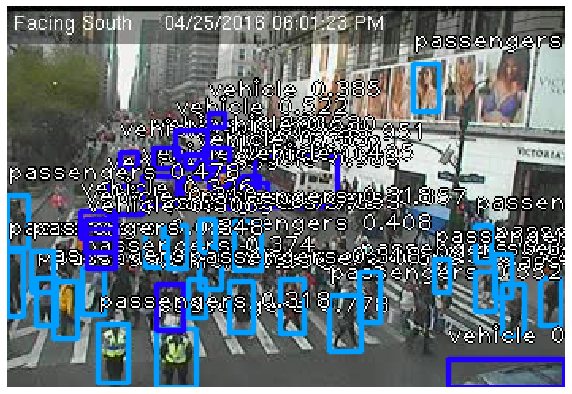

In [0]:

uploaded = files.upload()
img_infer = list(uploaded)[0]

print('Running inference on: ' + img_infer)
img_inference(img_infer)